# Initialization

In [ ]:
import nltk
print(nltk.__version__)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Part 2: Preprocessing

In [4]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

### 2.1 Data Cleaning

In [5]:
# Load data
df = pd.read_csv('combined_news_articles_data.csv')

# Handle missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Fill missing dates with mode
df['published_date'] = df['published_date'].fillna('Unknown date')

# Drop rows with missing content
df = df.dropna(subset=['article_content'])

# Remove duplicates
df = df.drop_duplicates(subset=['headline'])

# Convert dates to datetime format (if needed)
try:
    df['published_date'] = pd.to_datetime(df['published_date'])
except:
    pass

print("\nData after cleaning:")
print(f"Total articles: {len(df)}")
print(df.info())

Missing values before cleaning:
published_date       0
headline             6
publisher            0
article_content    133
category             0
dtype: int64

Data after cleaning:
Total articles: 1021
<class 'pandas.core.frame.DataFrame'>
Index: 1021 entries, 0 to 1158
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   published_date   1021 non-null   datetime64[ns]
 1   headline         1020 non-null   object        
 2   publisher        1021 non-null   object        
 3   article_content  1021 non-null   object        
 4   category         1021 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 47.9+ KB
None


### 2.2 Text Preprocessing

In [6]:
# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

# Initialize objects
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords and lemmatize
    processed = [lemmatizer.lemmatize(word) for word in tokens 
                if word not in stop_words and len(word) > 2]
    
    return ' '.join(processed)

# Apply preprocessing
df['clean_content'] = df['article_content'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to C:\Users\CTN new
[nltk_data]     Installation\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\CTN new
[nltk_data]     Installation\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\CTN new
[nltk_data]     Installation\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\CTN new
[nltk_data]     Installation\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [7]:
# Show example
print("\nOriginal vs Cleaned Text:")
print("Original:", df['article_content'].iloc[1][:200])
print("Cleaned:", df['clean_content'].iloc[1][:200])


Original vs Cleaned Text:
Original: US President Donald Trump has hosted top purchasers of the cryptocurrency that bears his name at a gala dinner, in an event that protesters and his Democrat opponents branded as "corrupt".$TRUMP was l
Cleaned: president donald trump hosted top purchaser cryptocurrency bear name gala dinner event protester democrat opponent branded corrupttrump launched shortly inauguration january initially rocketing value 


### 2.3 Handle Class Imbalance

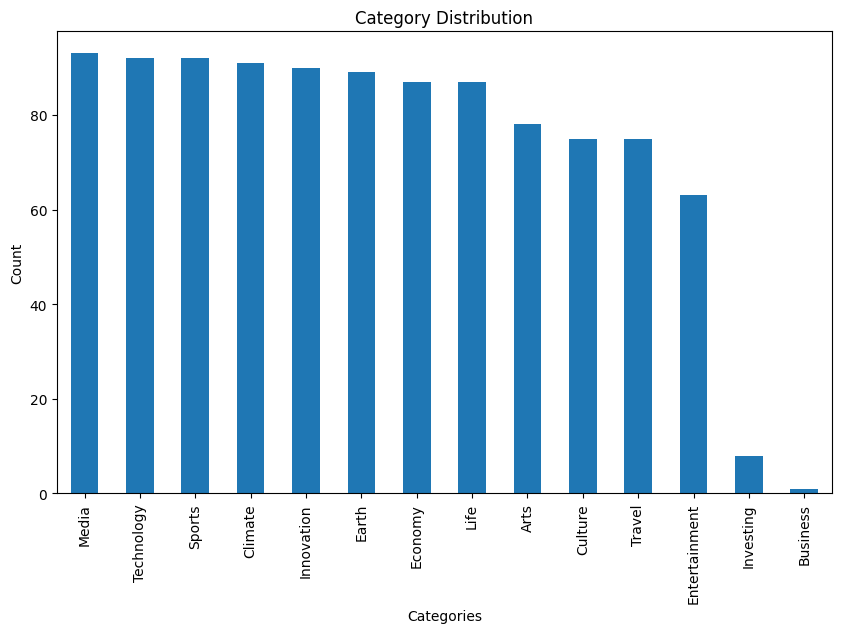

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 1, n_samples = 1

In [8]:
# Check class distribution
category_dist = df['category'].value_counts()
plt.figure(figsize=(10,6))
category_dist.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

# Handle imbalance using SMOTE (example)
if len(category_dist) > 1:
    from imblearn.over_sampling import SMOTE
    from sklearn.feature_extraction.text import TfidfVectorizer

    # Vectorize text
    tfidf = TfidfVectorizer(max_features=5000)
    X = tfidf.fit_transform(df['clean_content'])
    y = df['category']

    # Resample
    smote = SMOTE()
    X_res, y_res = smote.fit_resample(X, y)
    
    print("\nResampled class distribution:", np.unique(y_res, return_counts=True))
else:
    print("Insufficient classes for balancing")

### 2.4 Exploratory Data Analysis (EDA)